# Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('database.csv')
df.head(7)

,article_id,full_name,sex,birth_year,city,state,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
0,308,Aristotle,Male,-384,Stageira,NaN,Greece,Europe,40.33333,23.50000,Philosopher,Philosophy,Humanities,152,56355172,370758,31.9938
1,22954,Plato,Male,-427,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,142,46812003,329662,31.9888
2,1095706,Jesus Christ,Male,-4,Judea,NaN,Israel,Asia,32.50000,34.90000,Religious Figure,Religion,Institutions,214,60299092,281771,31.8981
3,25664190,Socrates,Male,-469,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,137,40307143,294213,31.6521
4,783,Alexander the Great,Male,-356,Pella,NaN,Greece,Europe,40.80000,22.51667,Military Personnel,Military,Institutions,138,48358148,350421,31.5840
5,18079,Leonardo da Vinci,Male,1452,Vinci,NaN,Italy,Europe,43.78333,10.91667,Inventor,Invention,Science & Technology,174,88931135,511098,31.4644
6,5823,Confucius,Male,-551,Qufu,NaN,China,Asia,NaN,NaN,Philosopher,Philosophy,Humanities,192,22363652,116477,31.3705


# Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11341 entries, 0 to 11340
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   article_id                   11341 non-null  int64  
 1   full_name                    11341 non-null  object 
 2   sex                          11341 non-null  object 
 3   birth_year                   11341 non-null  object 
 4   city                         11341 non-null  object 
 5   state                        2172 non-null   object 
 6   country                      11308 non-null  object 
 7   continent                    11311 non-null  object 
 8   latitude                     10294 non-null  float64
 9   longitude                    10294 non-null  float64
 10  occupation                   11341 non-null  object 
 11  industry                     11341 non-null  object 
 12  domain                       11341 non-null  object 
 13  article_language

In [4]:
print('Missing Value in Each Column:')
print(df.isna().sum())

Missing Value in Each Column:
article_id                        0
full_name                         0
sex                               0
birth_year                        0
city                              0
state                          9169
country                          33
continent                        30
latitude                       1047
longitude                      1047
occupation                        0
industry                          0
domain                            0
article_languages                 0
page_views                        0
average_views                     0
historical_popularity_index       0
dtype: int64


In [5]:
df.describe()

,article_id,latitude,longitude,article_languages,page_views,average_views,historical_popularity_index
count,1.134100e+04,10294.000000,10294.000000,11341.000000,1.134100e+04,1.134100e+04,11341.000000
mean,2.282303e+06,39.931860,-7.039516,40.768892,4.200961e+06,8.941360e+04,22.308241
std,5.745971e+06,18.688257,55.118931,17.467776,7.677474e+06,1.214613e+05,3.359037
min,3.070000e+02,-51.633330,-175.200560,26.000000,1.965000e+03,4.900000e+01,9.879400
25%,7.056000e+04,37.916670,-56.072705,29.000000,6.286420e+05,1.842000e+04,20.432000
50%,2.754430e+05,43.716670,4.483330,35.000000,1.602331e+06,4.384400e+04,23.028000
75%,9.668110e+05,50.936390,17.210003,46.000000,4.484694e+06,1.072280e+05,24.589000
max,3.870783e+07,70.073330,178.017780,214.000000,1.452506e+08,1.515232e+06,31.993800


# Quick Feature Selection

In [6]:
df.drop(columns=['article_id','full_name','state','latitude','longitude','city'],inplace=True)
df = df.dropna().reset_index(drop=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11278 entries, 0 to 11277
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sex                          11278 non-null  object 
 1   birth_year                   11278 non-null  object 
 2   country                      11278 non-null  object 
 3   continent                    11278 non-null  object 
 4   occupation                   11278 non-null  object 
 5   industry                     11278 non-null  object 
 6   domain                       11278 non-null  object 
 7   article_languages            11278 non-null  int64  
 8   page_views                   11278 non-null  int64  
 9   average_views                11278 non-null  int64  
 10  historical_popularity_index  11278 non-null  float64
dtypes: float64(1), int64(3), object(7)
memory usage: 969.3+ KB


In [8]:
df.head()

,sex,birth_year,country,continent,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
0,Male,-384,Greece,Europe,Philosopher,Philosophy,Humanities,152,56355172,370758,31.9938
1,Male,-427,Greece,Europe,Philosopher,Philosophy,Humanities,142,46812003,329662,31.9888
2,Male,-4,Israel,Asia,Religious Figure,Religion,Institutions,214,60299092,281771,31.8981
3,Male,-469,Greece,Europe,Philosopher,Philosophy,Humanities,137,40307143,294213,31.6521
4,Male,-356,Greece,Europe,Military Personnel,Military,Institutions,138,48358148,350421,31.5840


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11278 entries, 0 to 11277
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sex                          11278 non-null  object 
 1   birth_year                   11278 non-null  object 
 2   country                      11278 non-null  object 
 3   continent                    11278 non-null  object 
 4   occupation                   11278 non-null  object 
 5   industry                     11278 non-null  object 
 6   domain                       11278 non-null  object 
 7   article_languages            11278 non-null  int64  
 8   page_views                   11278 non-null  int64  
 9   average_views                11278 non-null  int64  
 10  historical_popularity_index  11278 non-null  float64
dtypes: float64(1), int64(3), object(7)
memory usage: 969.3+ KB


In [10]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [11]:
encode = OrdinalEncoder()
encode.fit(df[['sex','country','continent','occupation','industry','domain']])
df[['sex','country','continent','occupation','industry','domain']] = encode.transform(df[['sex','country','continent','occupation','industry','domain']])

In [12]:
df.loc[df["birth_year"] == "530s", "birth_year"] = 530
df.loc[df["birth_year"] == "1237?", "birth_year"] = 1237
df = df.drop(df.index[df.loc[:,"birth_year"] == "Unknown"])
df.loc[:, "birth_year"] = pd.to_numeric(df.loc[:,"birth_year"])

In [13]:
df.head()

,sex,birth_year,country,continent,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
0,1.0,-384,61.0,2.0,59.0,23.0,3.0,152,56355172,370758,31.9938
1,1.0,-427,61.0,2.0,59.0,23.0,3.0,142,46812003,329662,31.9888
2,1.0,-4,78.0,1.0,74.0,24.0,4.0,214,60299092,281771,31.8981
3,1.0,-469,61.0,2.0,59.0,23.0,3.0,137,40307143,294213,31.6521
4,1.0,-356,61.0,2.0,53.0,19.0,4.0,138,48358148,350421,31.5840


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11276 entries, 0 to 11277
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sex                          11276 non-null  float64
 1   birth_year                   11276 non-null  int64  
 2   country                      11276 non-null  float64
 3   continent                    11276 non-null  float64
 4   occupation                   11276 non-null  float64
 5   industry                     11276 non-null  float64
 6   domain                       11276 non-null  float64
 7   article_languages            11276 non-null  int64  
 8   page_views                   11276 non-null  int64  
 9   average_views                11276 non-null  int64  
 10  historical_popularity_index  11276 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 1.0 MB


# Modeling

## Dataset Splitting

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop(columns=['historical_popularity_index'])
y = df['historical_popularity_index']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((9020, 10), (2256, 10), (9020,), (2256,))

## Learning 

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [18]:
param_rf = {
    'n_estimators':[100,150,200],
    'max_depth':[20,50,80],
    'max_features':[0.3,0.6,0.8],
    'min_samples_leaf':[1,5,10],
}

In [19]:
rf = RandomForestRegressor(n_jobs=-1,random_state=42)

In [20]:
model_rf = GridSearchCV(rf,param_rf,cv=3,n_jobs=-1,verbose=1)
model_rf.fit(X_train,y_train)

print(model_rf.best_params_)
print("Train data R squared score: ", model_rf.score(X_train,y_train))
print("Test data R squared score: ", model_rf.score(X_test,y_test))

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:  2.9min finished


{'max_depth': 50, 'max_features': 0.6, 'min_samples_leaf': 1, 'n_estimators': 200}
Train data R squared score:  0.990762201553902
Test data R squared score:  0.944837462080995


# Evaluation

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [22]:
y_pred = model_rf.predict(X_test)

In [23]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [24]:
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 0.5956149401595746
MSE is 0.6401514071494155
R2 score is 0.944837462080995


# Feature Importances Based on Model

In [25]:
rf_selected = RandomForestRegressor(max_depth=50, max_features=0.6, min_samples_leaf=1, 
                                    n_estimators=200,n_jobs=-1,random_state=42) 

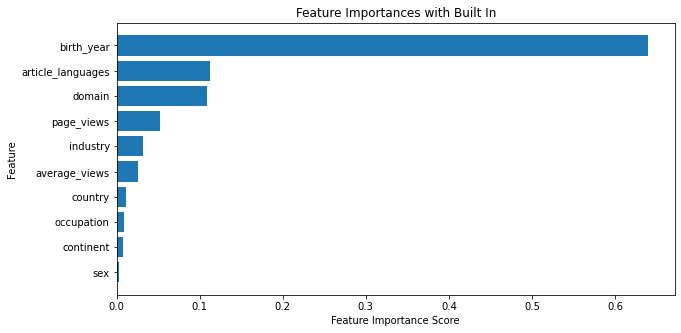

In [28]:
# Random Forest Built In

rf_selected.fit(X_train, y_train)

sorted_idx = rf_selected.feature_importances_.argsort()

fig = plt.subplots(figsize=(10,5))
plt.barh(X_train.columns[sorted_idx], rf_selected.feature_importances_[sorted_idx])
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importances with Built In")

plt.show()

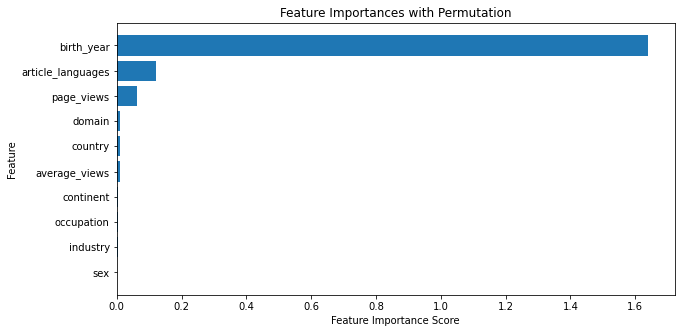

In [29]:
# Permutation

from sklearn.inspection import  permutation_importance

perm_importance = permutation_importance(rf_selected, X_test, y_test)

sorted_idx = perm_importance.importances_mean.argsort()

fig = plt.subplots(figsize=(10,5))
plt.barh(X_train.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importances with Permutation")

plt.show()